<a href="https://colab.research.google.com/github/D-Idan/CNNonMNIST/blob/main/CNN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
single_image = x_train[0]

In [ ]:
single_image.shape

(28, 28)

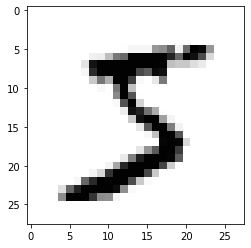

In [ ]:
plt.imshow(single_image, cmap='Greys')

In [ ]:
y_train[0]

5

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_example = to_categorical(y_train)

In [ ]:
y_example.shape

(60000, 10)

In [ ]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [ ]:
y_cat_train = to_categorical(y_train, num_classes=10)

Normalization

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
scaled_image = x_train[0]

In [ ]:
print(scaled_image.max())
print(scaled_image.min())

1.0
0.0


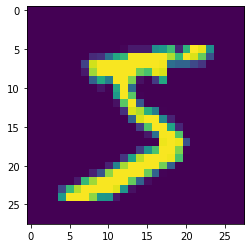

In [ ]:
plt.imshow(scaled_image)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# batch_size, width, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
# batch_size, width, height, color_channels
x_test = x_test.reshape(10000,28,28,1)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

model.add( Conv2D(filters=32, kernel_size=(4,4),strides=(1,1), padding='same',
                 input_shape=(28,28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2),))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

#Output Layer SOFTMAX _> MULTI-CLASS
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10, validation_data=(x_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 21s 5ms/step - loss: 0.1395 - accuracy: 0.9586 - val_loss: 0.0537 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0474 - accuracy: 0.9855 - val_loss: 0.0425 - val_accuracy: 0.9866
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0469 - val_accuracy: 0.9844


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.139476,0.958633,0.053712,0.9823
1,0.047366,0.985467,0.042527,0.9866
2,0.030385,0.990233,0.046908,0.9844


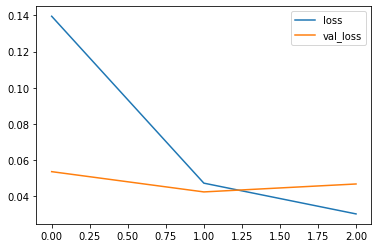

In [ ]:
metrics[['loss', 'val_loss']].plot()

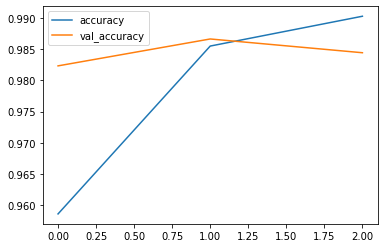

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0469 - accuracy: 0.9844


[0.046908050775527954, 0.9843999743461609]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions = np.argmax(predictions,axis=1)

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.96      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
confusion_matrix(y_test, predictions)

array([[ 972,    0,    3,    0,    0,    1,    2,    1,    0,    1],
       [   1, 1131,    0,    1,    0,    0,    2,    0,    0,    0],
       [   0,    3, 1013,    8,    0,    0,    1,    5,    2,    0],
       [   0,    0,    1, 1004,    0,    2,    0,    2,    1,    0],
       [   0,    0,    1,    1,  975,    0,    2,    0,    0,    3],
       [   1,    0,    0,   10,    0,  880,    1,    0,    0,    0],
       [   8,    3,    0,    2,    1,    3,  940,    0,    1,    0],
       [   0,    5,    5,    2,    0,    0,    0, 1011,    1,    4],
       [   6,    0,    3,    9,    1,    8,    3,    3,  938,    3],
       [   2,    3,    0,    4,    6,    7,    0,    6,    1,  980]])

In [ ]:
import seaborn as sns

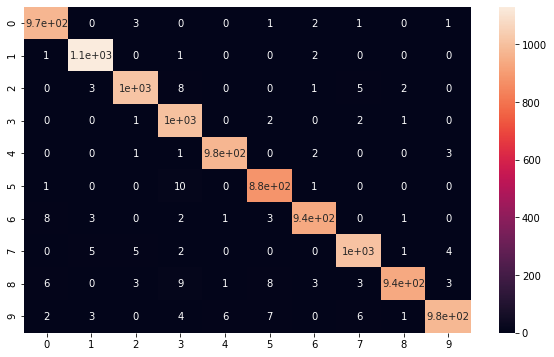

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [ ]:
 my_num = x_test[8]

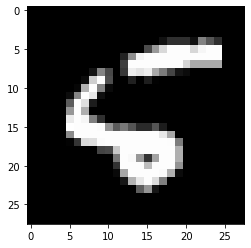

In [ ]:
plt.imshow(my_num.reshape(28,28), cmap='gray')

In [ ]:
y_test[8]

5

In [ ]:
model.predict(my_num.reshape(1,28,28,1))

array([[1.1558946e-05, 2.1020019e-09, 1.1598643e-09, 2.5455631e-07,
        2.6944539e-07, 9.9704581e-01, 2.6018461e-03, 8.5836671e-09,
        1.0132897e-04, 2.3898386e-04]], dtype=float32)

In [ ]:
np.argmax(model.predict(my_num.reshape(1,28,28,1)))

5